# King County Housing 

### Overview

The purpose of this notebook will be to explore the features that have the highest contribution to the market value of properties in King County Washington. Upon analyzing the King County house sales data, we will help local real estate agency to answer the questions from their clients, i.e. homeowners. In this kernel, I use various regression methods and try to predict the house prices.

### Importing Relavent Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Importing Dataset

In [2]:
data = pd.read_csv('kc_house_data.csv')

### Exploratory Data Analysis

Print the shape of the dataset

In [3]:
print(data.shape)
data.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now we know the count, mean, standard deviation, min and max etc of each variable.

In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Waterfront and View

For waterfront, we'll find out what the values are and fill them with 0.

In [7]:
data.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
data.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

Because there are no values, we can assume they're not on the waterfront. A zero will signify no value in binary terms.

In [9]:
# fill NaN values in waterfront columns with 0
values = {'view':0, 'waterfront':0}
data.fillna(value=values, inplace=True)
data['waterfront'].isna().sum()

0

Let's map out the waterfront properties to get a visual. First we'll import folium to use it's maps.

In [10]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

Next we'll assign the index and map out each waterfront property and in addition, allow the user the ability to click on each property and see a popup with price and square footage.

In [11]:
waterfront = data[(data['waterfront'] == "YES")]

waterfront_map = folium.Map(location=[waterfront.lat.mean(), waterfront.long.mean()],
                           zoom_start=11,
                           tiles='openstreetmap')
for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    price = waterfront.price[i]
    sqft_living = waterfront.sqft_living[i]
    marker=folium.Marker([lat, long]).add_to(waterfront_map)
    #add popup text with price and sqft_living for each property to see property values on waterfront
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)
    
waterfront_map

In [12]:
len(waterfront)

146

### View

Let's see if there's overlap for waterfront and view. We'll start with finding the unique values in the variable view.

In [13]:
data.view.unique()

array(['NONE', 0, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

Next, we'll convert the string values to numeric values.

In [14]:
pd.options.mode.chained_assignment = None  # default='warn'
#Convert string values to numeric values
data.view[data.view == 'NONE'] = 0
data.view[data.view == 'AVERAGE'] = 1
data.view[data.view == 'FAIR'] = 2
data.view[data.view == 'GOOD'] = 3
data.view[data.view == 'EXCELLENT'] = 4
data['view'].unique()

array([0, 3, 4, 1, 2], dtype=object)

Then import the variable view with a value of greater than or equal to 2 ("fair") and allow for that same popup we created for each property when plotting "waterfront".

In [15]:
view = data[(data['view'] >= 2)]
view_map = folium.Map(location=[view.lat.mean(), view.long.mean()],
                           zoom_start=11,
                           tiles='openstreetmap')
for i in view.index:
    lat = view.lat[i]
    long = view.long[i]
    price = view.price[i]
    sqft_living = view.sqft_living[i]
    marker=folium.Marker([lat, long]).add_to(view_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(view_map)
    
view_map

In [16]:
len(view)

1155

It looks like fair and above views are also on the waterfront. Let's see if these have any correlation to price by using a heatmap overlayed on the property parcel map of King County. I'll have to create bins that store the homes by price value groups.

In [17]:
#Make a new column for 'price' in duplicate df with 7 bins
df = data

df['price_bins'] = df.price.map(lambda x: 1 if x >= 1 and x <= 250000
                               else (2 if x > 250000 and x <= 500000
                                    else (3 if x > 500000 and x <= 750000
                                         else (4 if x > 750000 and x <= 1000000
                                              else (5 if x > 1000000 and x <= 2000000
                                                   else (6 if x > 2000000 and x <= 4000000
                                                        else 7))))))

Each bin has a value of:
* <= \\$250k, 
* > \\$250k but <= \\$500k
* > \\$500k but <= \\$750k
* > \\$750k but <= \\$1mil 
* > \\$1mil but <= \\$2mil
* > \\$2mil but <= \\$4mil
* > \\$4mil

We also assigned each bin to a categorical numeric value 1-7. In the next cell we will use the latitudinal and longitudinal coordinates to of each property and categorize them into latitudinal/longitudinal groups equal to the price bins groups we just created.

In [18]:
# house coordinates by price

lat1 = df.loc[df['price_bins'] == 1].lat
long1 = df.loc[df['price_bins'] == 1].long

lat2 = df.loc[df['price_bins'] == 2].lat
lat2 = df.loc[df['price_bins'] == 2].long

lat3 = df.loc[df['price_bins'] == 3].lat
lat3 = df.loc[df['price_bins'] == 3].long

lat4 = df.loc[df['price_bins'] == 4].lat
lat4 = df.loc[df['price_bins'] == 4].long

lat5 = df.loc[df['price_bins'] == 5].lat
lat5 = df.loc[df['price_bins'] == 5].long

lat6 = df.loc[df['price_bins'] == 6].lat
lat6 = df.loc[df['price_bins'] == 6].long

lat7 = df.loc[df['price_bins'] == 7].lat
lat7 = df.loc[df['price_bins'] == 7].long

Next, import descartes, geopandas and shapely.geometry so we can plot each property on a basemap I found on the King County assessors office website that shows each property parcel. 

In [19]:
# import necessary packages

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# create basemap

basemap = gpd.read_file('Parcels_for_King_County_with_Address_with_Property_Information___parcel_address_area.shp')

In [20]:
crs = {'init' : 'epsg:4326'}

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# using lat and long for geometry
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:3]

# creating a dataframe with a new column for geometry points
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

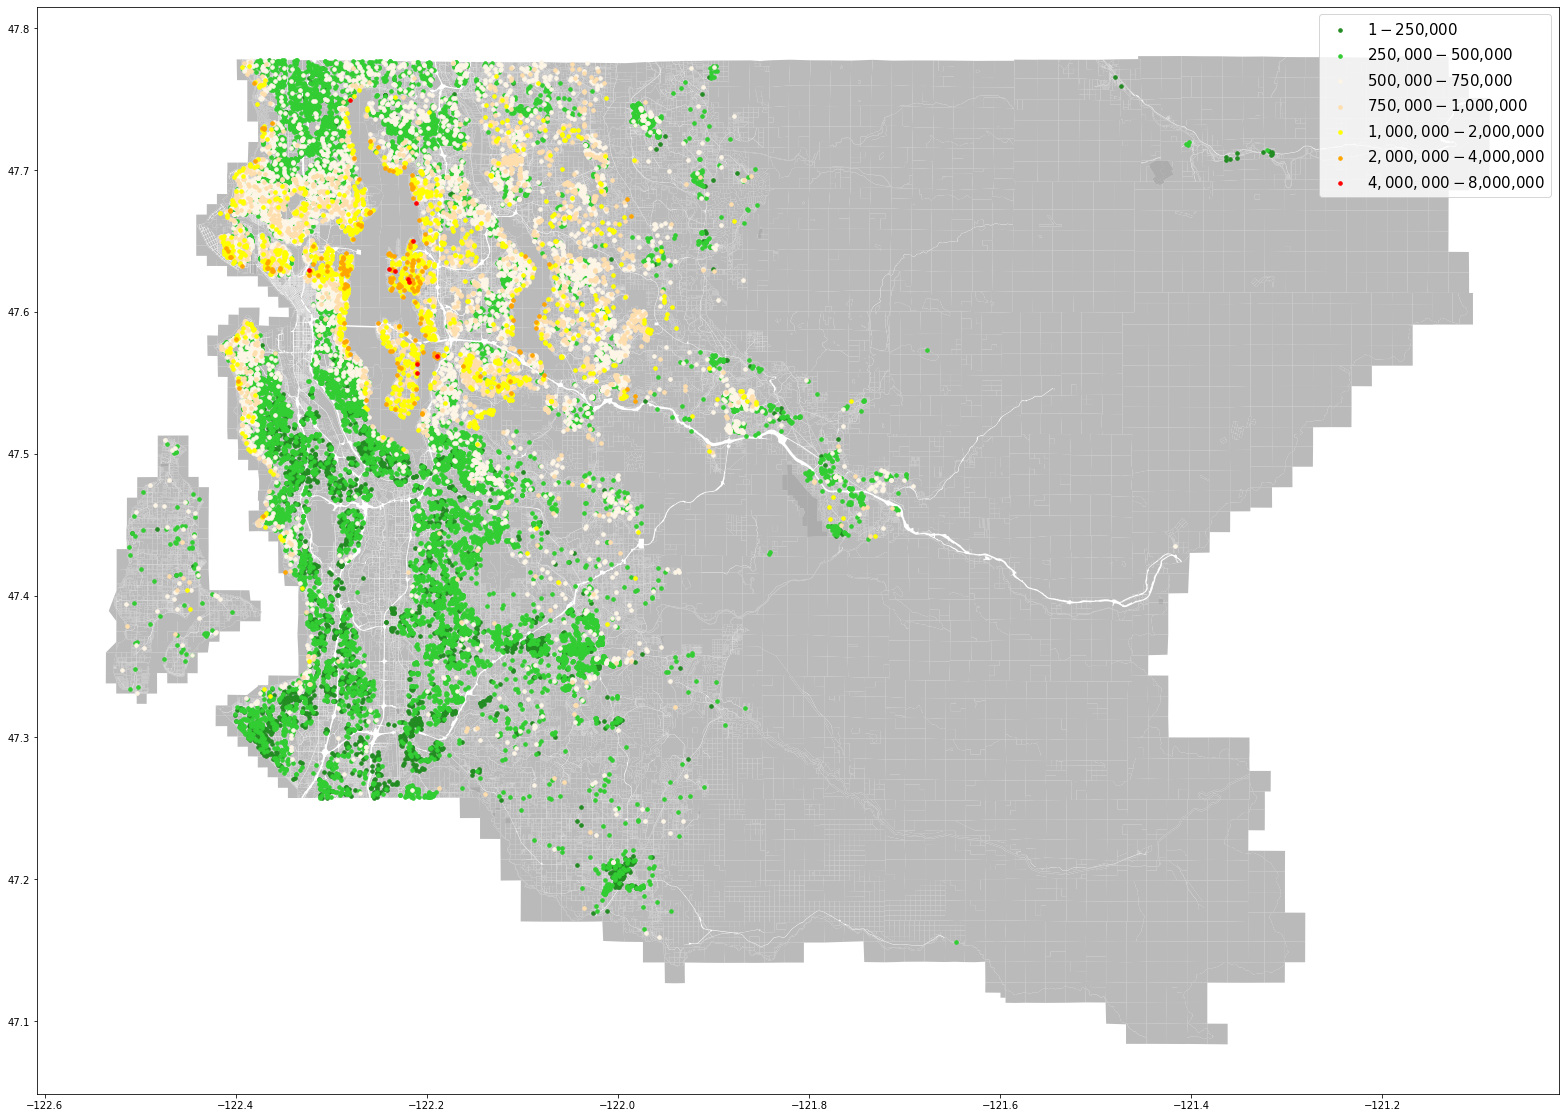

In [21]:
# plotting basemap with 7 price ranges

fig, ax = plt.subplots(figsize=(40,20))
basemap.plot(ax = ax, alpha = 0.8, color = 'darkgrey')

geo_df[geo_df['price_bins'] == 1].plot(ax=ax, markersize = 50, color = 'forestgreen', marker = '.', label = '$1 - $250,000')
geo_df[geo_df['price_bins'] == 2].plot(ax=ax, markersize = 50, color = 'limegreen', marker = '.', label = '$250,000 - $500,000')
geo_df[geo_df['price_bins'] == 3].plot(ax=ax, markersize = 50, color = 'oldlace', marker = '.', label = '$500,000 - $750,000')
geo_df[geo_df['price_bins'] == 4].plot(ax=ax, markersize = 50, color = 'navajowhite', marker = '.', label = '$750,000 - $1,000,000')
geo_df[geo_df['price_bins'] == 5].plot(ax=ax, markersize = 50, color = 'yellow', marker = '.', label = '$1,000,000 - $2,000,000')
geo_df[geo_df['price_bins'] == 6].plot(ax=ax, markersize = 50, color = 'orange', marker = '.', label = '$2,000,000 - $4,000,000')
geo_df[geo_df['price_bins'] == 7].plot(ax=ax, markersize = 50, color = 'red', marker = '.', label = '$4,000,000 - $8,000,000')

plt.legend(prop={'size':15})

We can see the property values increase as they congregate closer to the metropolitan area of Seattle. We can also see it spread to Belleview... and can likely attribute that to the tech boom there. There's also an intersection of the highest valued homes on the waterfront but we'll check out how high the correlation to price is later. 

Both 'view' and 'waterfront' are categorical value. Let's convert the strings into integers.

In [22]:
#convert string categorical values for waterfront to integers
data.waterfront[data.waterfront == 'NO'] = 0
data.waterfront[data.waterfront == 'YES'] = 1
data['waterfront'].describe()

count     21597
unique        2
top           0
freq      21451
Name: waterfront, dtype: int64

In [23]:
data['waterfront'].isna().sum()

0

In [24]:
data['waterfront'].unique()

array([0, 1], dtype=object)

In [25]:
data['waterfront'] = data['waterfront'].astype(str).astype(int)

In [26]:
data['waterfront'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


### yr_built and yr_renovated

We'll explore the unique values for 'yr_built' then do the same for 'yr_renovated.'

In [27]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [28]:
data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [29]:
#df of yr_built and yr_renovated columns
years = data.loc[:,['yr_built', 'yr_renovated']]
years

,yr_built,yr_renovated
0,1955,0.0
1,1951,1991.0
2,1933,NaN
3,1965,0.0
4,1987,0.0
...,...,...
21592,2009,0.0
21593,2014,0.0
21594,2009,0.0
21595,2004,0.0


Printing a dataframe with years with null values.

In [30]:
#df with only NaN values from years df
yrs_NaN = years.isnull()

yrRow_has_NaN = yrs_NaN.any(axis=1)

yrRows_with_NaN = years[yrRow_has_NaN]


print(yrRows_with_NaN)

       yr_built  yr_renovated
2          1933           NaN
12         1927           NaN
23         1985           NaN
26         1915           NaN
28         1948           NaN
...         ...           ...
21576      2008           NaN
21577      2006           NaN
21579      2006           NaN
21581      2007           NaN
21583      2003           NaN

[3842 rows x 2 columns]


Dropping the date column but replacing it with a month_sold column and a year_sold column.

In [31]:
date = data['date'].str.split('/', expand=True)
data['month_sold'] = date[0].astype('float64')
data['year_sold'] = date[2].astype('float64')

#Drop original date column
data.drop(columns=['date'], axis = 1, inplace=True)

Creating an age column by subtracting year_built from the last year we have data (2015) then dropping the yr_built column.

In [32]:
data['age'] = 2015 - data.yr_built
data = data.drop(columns = ['yr_built'], axis =1)

Filling in null values for yr_renovated, then creating a renovated column and setting it's binary value to 1 and 0 based on whether or not it's renovation is less than 10 years old.

In [33]:
#fill missing values
data.yr_renovated.fillna(0.0, inplace = True)

#create renovated column
data['renovated'] = data.year_sold - data.yr_renovated

#replace any values less than 10 with 1, and any values over 10 with 0
renovated = data.renovated.values
age = data.age.values
values = np.where(renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)

#Drop yr_renovated column
data.drop(columns = ['yr_renovated'], axis = 1, inplace =True)

### Condition

In [34]:
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

Converting the stringed categorical variables to integers.

In [35]:
data.condition[data.condition == 'Poor'] = 1
data.condition[data.condition == 'Fair'] = 2
data.condition[data.condition == 'Average'] = 3
data.condition[data.condition == 'Good'] = 4
data.condition[data.condition == 'Very Good'] = 5
data['condition'].unique()

array([3, 5, 4, 1, 2], dtype=object)

In [36]:
data['condition'] = data['condition'].astype(str).astype(int)
data['condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: condition
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


### sqft_basement

Filling all the null values with 0 and converting the stringed variables to integers.

In [37]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [38]:
data.sqft_basement[data.sqft_basement == '?'] = 0

In [39]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [40]:
data['sqft_basement'] = data['sqft_basement'].astype(int)

In [41]:
data['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


In [42]:
data['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  710,  840,  380,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960,  280,  870, 1100,  460,
       1400,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,  350,
        935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,  340,
        470,  370,  140, 1760,  130,  520,  890, 1110,  150, 1720,  810,
        190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,  310,  930,
       1390,  610, 1830, 1300,  510, 1330, 1590,  920, 1320, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

Creating an boolean column for whether a property has a basement.

In [43]:
# Create a boolean column for whether a property has a basement
data['has_bsmnt'] = np.where((data['sqft_basement'] > 0), 1,0)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,price_bins,geometry,month_sold,year_sold,age,renovated,has_bsmnt
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,-122.257,1340,5650,1,POINT (-122.25700 47.51120),10.0,2014.0,60,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,-122.319,1690,7639,3,POINT (-122.31900 47.72100),12.0,2014.0,64,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,-122.233,2720,8062,1,POINT (-122.23300 47.73790),2.0,2015.0,82,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,-122.393,1360,5000,3,POINT (-122.39300 47.52080),12.0,2014.0,50,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,-122.045,1800,7503,3,POINT (-122.04500 47.61680),2.0,2015.0,28,0,0


### Bathrooms

In [44]:
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

### Grade

In [45]:
data.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

### Residential Building Grades 
__Grades 1 -3__ Falls short of minimum building standards. Normally cabin or inferior structure.<br> 
__Grade 4__ Generally older low quality construction. Does not meet code.<br>
__Grade 5__ Lower construction costs and workmanship. Small, simple design.<br>
__Grade 6__ Lowest grade currently meeting building codes. Low quality materials, simple designs.<br>
__Grade 7__ Average grade of construction and design. Commonly seen in plats and older subdivisions.<br> 
__Grade 8__ Just above average in construction and design. Usually better materials in both the exterior and interior finishes.<br> 
__Grade 9__ Better architectural design, with extra exterior and interior design and quality.<br>
__Grade 10__ Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.<br>
__Grade 11__ Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.<br>
__Grade 12__ Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.<br>
__Grade 13__ Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries<br>

Splitting the string variables from the numerical ones and assigning the categorical variables to its numerical value.

In [46]:
data = data.assign(grade = lambda x: x['grade'].str.extract('(\d+)'))

In [47]:
data['grade'] = data['grade'].astype(str).astype(int)
data['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: int32

In [48]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

### Price

In [49]:
len(data['price'].unique())

3622

In [50]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

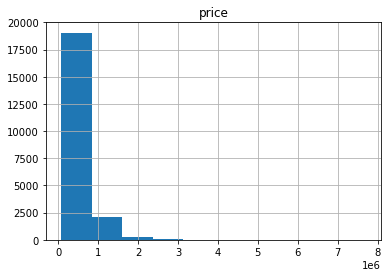

In [51]:
data.hist(column='price')

There are outlying variables that provide a heavy left skew. We'll eliminate the outlying prices of \\$200k or less and \\$500k.

In [52]:
#eliminate properties valued at $200000 or less and luxury homes from data set, 
#luxury homes defined as $500,000 and over 
#dropped 10041 rows
data = data[(data.price < 500000) & (data.price > 200000)]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

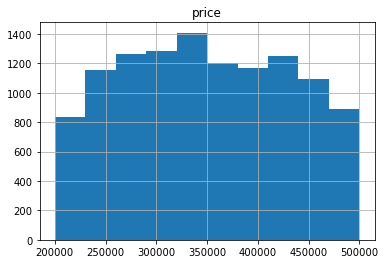

In [53]:
data.hist(column='price')

That's better.

### Drop columns seen as irrelavent

I'll use a bar graph to see the correlation between price and our variables to then start eliminating low correlating features.

<AxesSubplot:>

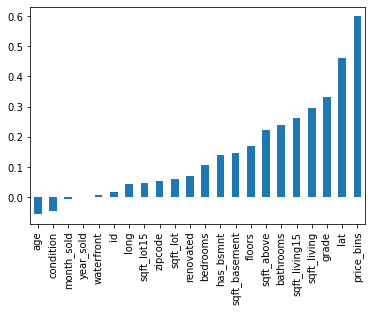

In [54]:
data.corr()['price'].sort_values().drop('price').plot(kind='bar')

I'll drop the following columns:

* id
* condition
* month_sold
* year_sold
* waterfront
* sqft_lot15
* sqft_lot
* renovated
* price_bins
* geometry

In [55]:
data.drop(columns = ['id', 'condition', 'month_sold', 'year_sold', 'waterfront', 'id', 'sqft_lot15', 'sqft_lot', 'renovated', 'price_bins', 'geometry'], inplace=True)
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_living15', 'age', 'has_bsmnt'],
      dtype='object')

Now check for collinearity in predictors so I can drop highly collinear features.

In [56]:
# df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df.head()

,level_0,level_1,0
0,price,price,1.0
15,bedrooms,bedrooms,1.0
180,age,age,1.0
165,sqft_living15,sqft_living15,1.0
150,long,long,1.0


In [57]:
#zip the variable name columns(which were only named level_0 and level_1 by default) in a new column named "pairs".
df['pairs'] = list(zip(df.level_0, df.level_1))

#set index to pairs
df.set_index(['pairs'], inplace=True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace=True)

#rename correlation column 'cc' instead of 0
df.columns = ['cc']

#drop duplicates
df.drop_duplicates(inplace=True)

#list the paris with a high correlation, idicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_basement, has_bsmnt)",0.846508
"(sqft_above, sqft_living)",0.802445


I'll drop both sqft_basement and sqft_above.

In [58]:
# drop sqft_basement and sqft_above because of high collinearity
data.drop(columns=['sqft_basement', 'sqft_above'], inplace=True)
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'grade', 'zipcode', 'lat', 'long', 'sqft_living15', 'age', 'has_bsmnt'],
      dtype='object')

Check correlation again via a correlation matrix.

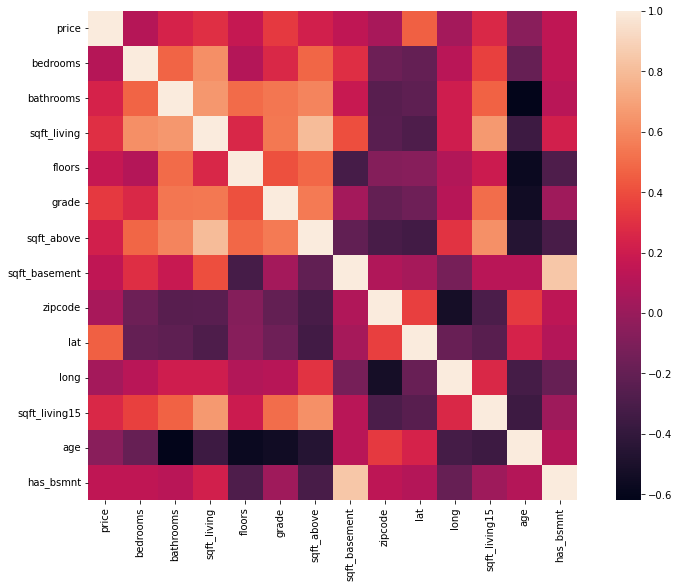

In [59]:
corrmat = data_pred.corr()
f, ax = plt.subplots(figsize = (14, 9))
sns.heatmap(corrmat, vmax = 1, square=True);

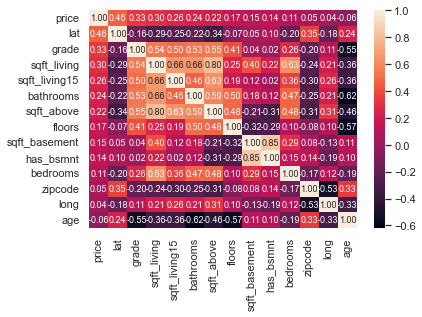

In [60]:
# price correlation matrix
k = 14 # number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data_pred[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':9}, yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

### First Regression Model - statsmodels only

#### No changes have been made to the features

Let's build our baseline regression model.

In [61]:
# build model for price and highest correlated feature

In [62]:
#statsmodels regression model with unchanged predictors from scatter matrix
outcome1 = 'price'
x_cols1 = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 
       'grade', 'zipcode', 'lat', 'long', 'sqft_living15','age',
       'has_bsmnt','view']
predictors1 = '+'.join(x_cols1)
formula1 = outcome1 + '~' + predictors1
model = ols(formula=formula1, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     763.1
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:36:51   Log-Likelihood:            -1.4303e+05
No. Observations:               11556   AIC:                         2.861e+05
Df Residuals:                   11540   BIC:                         2.862e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.135e+06   1.08e+06     -4.739      0.000   -7.26e+06   -3.01e+06
view[T.1]      2.889e+04   3695.984      7.816      0.000    2.16e+04    3.61e+04
view[T.2]      2.957e+04   6347.797      4.658      0.000    1.71e+04     4.2e+04
view[T.3]      4.902e+04   6195.457      7.913      0.000    3.69e+04    6.12e+04
view[T.4]      5.923e+04   1.36e+04      4.356      0.000    3.26e+04    8.59e+04
bedrooms      -6887.5016    848.378     -8.118      0.000   -8550.465   -5224.538
bathrooms      1.366e+04   1391.993      9.815      0.000    1.09e+04    1.64e+04
sqft_living      32.3913      1.754     18.471      0.000      28.954      35.829
floors         1.572e+04   1420.629     11.066      0.000    1.29e+04    1.85e+04
grade          2.697e+04    977.178     27.600      0.000    2.51e+04    2.89e+04
zipcode         -39.8853     12.493     -3.193      0.001     -64.373     -15.398
lat            3.137e+05   3921.915     79.996      0.000    3.06e+05    3.21e+05
long            4.79e+04   4787.080     10.005      0.000    3.85e+04    5.73e+04
sqft_living15    21.6895      1.685     12.868      0.000      18.386      24.993
age             610.1828     30.795     19.815      0.000     549.820     670.545
has_bsmnt      7249.1111   1352.408      5.360      0.000    4598.162    9900.060
==============================================================================
Omnibus:                       25.708   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.992
Skew:                           0.107   Prob(JB):                     2.27e-06
Kurtosis:                       3.090   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Let's interperet this. What do we know?

* The R-squared value is 0.498, which represents the proportion of the variance in the dependent variable (price) that is explained by the independent variables. A high R-squared value indicates that the model explains a lot of the variation in the dependent variable, in this case, 49.8% of the variation in the price is explained by the independent variables.

* The adjusted R-squared is 0.497, which is a modified version of the R-squared that adjusts for the number of independent variables in the model.
* The F-statistic is 763.1, which compares the model's ability to explain the relationship between the variables with the ability of a null model (a model with no explanatory variables) to explain the relationship. A high F-statistic value means that the model does a better job of explaining the relationship than the null model.
* The prob (F-statistic) is 0.00, which is the p-value associated with the F-statistic. A p-value less than 0.05 is considered to be statistically significant, which means that there is less than a 5% chance that the results are due to random chance. So the model is statistically significant.
* The Log-Likelihood is -1.4303e+05, is a measure of the goodness of fit of the model. A higher log-likelihood value means that the model fits the data well.
* The AIC is 2.861e+05, is a measure of the goodness of fit of the model and it also takes into account the complexity of the model. The AIC is calculated by adding the log-likelihood of the model to the number of parameters used in the model. Lower AIC score indicates a better model.
* The number of observations used in the model is 11556.
* The degrees of freedom of the residuals is 11540 and the degrees of freedom of the model is 15.
* Our Skew and Kurtosis suggest that this is farily normally distributed.

This isn't a great model. 

We'll prepare our second model by one-hot-encoding our categoricals.

In [63]:
#change values in floors columns to prepare for one hot encoding
def floor(value):
    if value == 1:
        return 1
    elif value == 1.5:
        return '1and_half'
    elif value == 2:
        return 2
    elif value == 2.5:
        return '2and_half'
    elif value == 3:
        return 3
    elif value == 3.5:
        return '3and_half'
       
data.floors = data.floors.apply(floor)

#dealing with the bathrooms predictor
#change values in bathrooms column to prepare for one hot encoding
def baths(value):
    if value == 1:
        return 1
    elif value < 2:
        return '1and_quart_plus'
    elif value == 2:
        return 2
    elif value < 3:
        return '2and_quart_plus'
    elif value == 3:
        return 3
    elif value > 3:
        return '3and_quart_plus'
data.bathrooms = data.bathrooms.apply(baths)

In [64]:
#convert datatype of columns bedrooms, bathrooms, floors, condition, zipcode, and grade to prepare for 
#one hot encoding
convert_dict = {'bedrooms': str, 'bathrooms': str, 'floors': str, 'zipcode': str, 
                'grade': str}
data = data.astype(convert_dict)

#create dummy variables for categoricals bedrooms, bathrooms, floors, condition, and grade
bedrooms_dum = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
bathrooms_dum = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)
floors_dum = pd.get_dummies(data['floors'], prefix='fl', drop_first=True)
zip_dum = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)
grade_dum = pd.get_dummies(data['grade'], prefix='gr', drop_first=True)

#remove orignial columns of dummy variables, add dummy columns
data = data.drop(['bedrooms', 'bathrooms', 'floors', 'zipcode', 'grade'], axis=1)
data = pd.concat([data, bedrooms_dum, bathrooms_dum, floors_dum, zip_dum, grade_dum], axis=1)
data.head()

,price,sqft_living,view,lat,long,sqft_living15,age,has_bsmnt,bed_2,bed_3,...,zip_98198,zip_98199,gr_11,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9
0,221900.0,1180,0,47.5112,-122.257,1340,60,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,1715,0,47.3097,-122.327,2238,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,291850.0,1060,0,47.4095,-122.315,1650,52,0,0,1,...,1,0,0,0,0,0,0,1,0,0
8,229500.0,1780,0,47.5123,-122.337,1780,55,1,0,1,...,0,0,0,0,0,0,0,1,0,0
9,323000.0,1890,0,47.3684,-122.031,2390,12,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Just to double check now that we have changed features, let's see if there's new collinearity between features.

In [65]:
#recheck collinearity as have changed features
#df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,


None. Ok let's build a second OLS model.

### Second regression model - statsmodels and sklearn

#### Binary categoricals have their columns, categoricals have been dummied.

In [66]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = data.price
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 9244 rows and 100 columns
y_train is a Series with 9244 values
The training mean squared error:  2219457137.680794
The test mean squared error:  2329530748.7342963
The training RSME:  47111.11479980912
The test RSME:  48265.21261461816


In [67]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:36:54   Log-Likelihood:            -1.1258e+05
No. Observations:                9244   AIC:                         2.254e+05
Df Residuals:                    9141   BIC:                         2.261e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.108e+06   2.95e+06     -1.054      0.292   -8.89e+06    2.67e+06
view[T.1]              2.49e+04   3456.954      7.202      0.000    1.81e+04    3.17e+04
view[T.2]             1.949e+04   5858.986      3.326      0.001    8000.811     3.1e+04
view[T.3]             3.842e+04   5785.535      6.641      0.000    2.71e+04    4.98e+04
view[T.4]             4.122e+04   1.21e+04      3.398      0.001    1.74e+04     6.5e+04
sqft_living             52.2590      1.661     31.457      0.000      49.002      55.515
lat                   1.811e+05   2.89e+04      6.257      0.000    1.24e+05    2.38e+05
long                   4.33e+04   2.22e+04      1.949      0.051    -254.938    8.69e+04
sqft_living15           23.2913      1.639     14.208      0.000      20.078      26.505
age                    197.5356     32.379      6.101      0.000     134.065     261.006
has_bsmnt            -5599.7143   1332.472     -4.202      0.000   -8211.658   -2987.771
bed_2                 1.272e+04   4977.861      2.556      0.011    2965.138    2.25e+04
bed_3                 1.251e+04   5004.433      2.500      0.012    2702.216    2.23e+04
bed_4                 1.385e+04   5176.362      2.675      0.007    3699.979     2.4e+04
bed_5                 2937.8515   5691.916      0.516      0.606   -8219.576    1.41e+04
bed_6                -7559.2627   7770.312     -0.973      0.331   -2.28e+04    7672.285
bed_7                -2.863e+04   1.68e+04     -1.702      0.089   -6.16e+04    4336.565
bed_8                -3.223e+04   3.43e+04     -0.940      0.347   -9.95e+04     3.5e+04
bed_9                -6.868e+04   4.81e+04     -1.428      0.153   -1.63e+05    2.56e+04
bath_1and_quart_plus  7272.1984   1680.534      4.327      0.000    3977.976    1.06e+04
bath_2                9177.6821   2077.311      4.418      0.000    5105.689    1.32e+04
bath_2and_quart_plus  1.854e+04   2207.030      8.402      0.000    1.42e+04    2.29e+04
bath_3                1.647e+04   4040.373      4.077      0.000    8550.751    2.44e+04
bath_3and_quart_plus  1.962e+04   4372.471      4.488      0.000    1.11e+04    2.82e+04
fl_1and_half           532.4733   2101.006      0.253      0.800   -3585.967    4650.914
fl_2                 -6122.7165   1787.190     -3.426      0.001   -9626.009   -2619.424
fl_2and_half          3415.8217   9509.130      0.359      0.719   -1.52e+04    2.21e+04
fl_3                 -2.909e+04   4055.537     -7.173      0.000    -3.7e+04   -2.11e+04
fl_3and_half          3.688e+04   3.37e+04      1.093      0.274   -2.93e+04    1.03e+05
zip_98002            -1.115e+04   5516.650     -2.021      0.043    -2.2e+04    -335.391
zip_98003            -2127.4894   4758.376     -0.447      0.655   -1.15e+04    7199.992
zip_98004             9.464e+04   4.82e+04      1.962    

#### Our Second Model... improving

* The R-squared value of 0.662 suggests that the model explains 66.2% of the variation in the dependent variable, which is a high proportion and indicates that the model has a good fit to the data.
* The adjusted R-squared is 0.658, which is a modified version of the R-squared that adjusts for the number of independent variables in the model. The difference between R-squared and adjusted R-squared is that the latter penalizes the model for each additional independent variable that is added to the model, if it does not improve the model's fit.
* The F-statistic is 179.0, which compares the model's ability to explain the relationship between the variables with the ability of a null model (a model with no explanatory variables) to explain the relationship. A high F-statistic value means that the model does a better job of explaining the relationship than the null model.
* The prob (F-statistic) is 0.00, which is the p-value associated with the F-statistic. A p-value less than 0.05 is considered to be statistically significant, which means that there is less than a 5% chance that the results are due to random chance. So the model is statistically significant.
* The Log-Likelihood is -1.1258e+05, is a measure of the goodness of fit of the model. A higher log-likelihood value means that the model fits the data well.
* The AIC is 2.254e+05, is a measure of the goodness of fit of the model and it also takes into account the complexity of the model. The AIC is calculated by adding the log-likelihood of the model to the number of parameters used in the model. Lower AIC score indicates a better model.
* The number of observations used in the model is 9244.
* The degrees of freedom of the residuals is 9143 and the degrees of freedom of the model is 100.
* The Covariance Type is nonrobust, which means that the model's covariance matrix is not robust to outliers.

This output suggests that the model has a good fit to the data and it explains 66.2% of the variation in the dependent variable. The F-statistic and the p-value indicate that the model is statistically significant and the Log-likelihood and AIC values suggest that the model has a good fit to the data.

In [68]:
data = data.drop('view', axis=1)

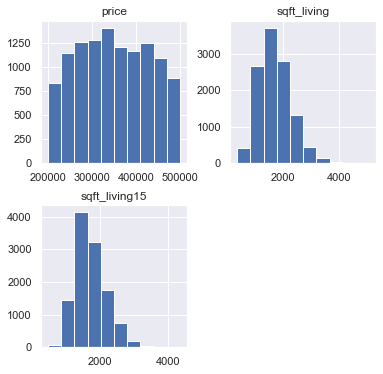

In [69]:
data[['price', 'sqft_living', 'sqft_living15']].hist(figsize=(6,6));

We'll log transform all the sqft variables.

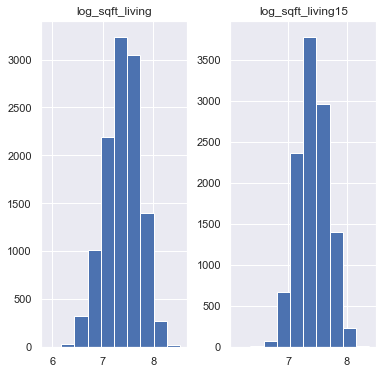

In [70]:
#log transform sqft_living and sqft_living15
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(data['sqft_living'])
data_log['log_sqft_living15'] = np.log(data['sqft_living15'])
data_log[['log_sqft_living', 'log_sqft_living15']].hist(figsize=(6,6));

Scaling price along with sqft_lot and sqft_living and creating a new dataframe of scaled features only.

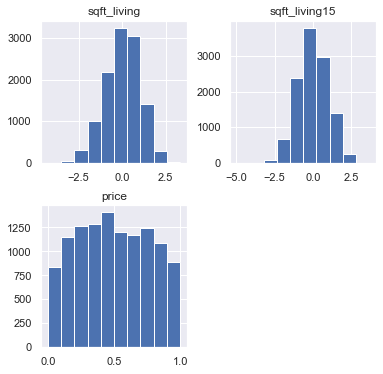

In [71]:
#scale price, sqft_living and sqftliving_log
sqft_living = data_log['log_sqft_living']
sqft_living15 = data_log['log_sqft_living15']
price = data['price']

scaled_price=(price - min(price)) / (max(price) - min(price))
scaled_sqftliving = (sqft_living - np.mean(sqft_living)) / np.sqrt(np.var(sqft_living))
scaled_sqftliving15 = (sqft_living15 - np.mean(sqft_living15)) / np.sqrt(np.var(sqft_living15))
#df with scaled features only
data_scaled = pd.DataFrame([])
data_scaled['sqft_living'] = scaled_sqftliving
data_scaled['sqft_living15'] = scaled_sqftliving15
data_scaled['price'] = scaled_price
data_scaled.hist(figsize=(6,6));

In [72]:
#df to add log and scaled sqft_living and sqft_living15
scaled_df = data.copy()

#drop original sqft_living, sqft_living15
scaled_df.drop(['price','sqft_living', 'sqft_living15'], axis=1, inplace=True)

#concat log and scaled sqft_living
scaled_df = pd.concat([scaled_df, data_scaled], axis=1)
scaled_df

,lat,long,age,has_bsmnt,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,...,gr_3,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,sqft_living,sqft_living15,price
0,47.5112,-122.257,60,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,-0.900372,-0.835569,0.072613
6,47.3097,-122.327,20,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0.184892,1.138046,0.191333
7,47.4095,-122.315,52,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,-1.211658,-0.034808,0.305885
8,47.5123,-122.337,55,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0.292868,0.257006,0.097958
9,47.3684,-122.031,12,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0.466915,1.390891,0.409766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,47.6993,-122.346,6,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,-0.146422,-0.325350,0.533155
21593,47.5107,-122.362,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1.049374,0.363601,0.666549
21594,47.5944,-122.299,6,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,-1.323309,-1.885521,0.673555
21595,47.5345,-122.069,11,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,-0.016574,-0.639635,0.666549


### Third regression model - statsmodels & sklearn

#### log transform & normalize sqft_living

In [73]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = scaled_df.price
X = scaled_df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 9244 rows and 99 columns
y_train is a Series with 9244 values
The training mean squared error:  0.025416562388860076
The test mean squared error:  0.025428844718817713
The training RSME:  0.1594257268726101
The test RSME:  0.15946424275936505


In [74]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:36:57   Log-Likelihood:                 3857.0
No. Observations:                9244   AIC:                            -7516.
Df Residuals:                    9145   BIC:                            -6810.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -8.1968     10.413     -0.787      0.431     -28.609      12.215
lat                      0.5977      0.098      6.069      0.000       0.405       0.791
long                     0.1605      0.079      2.026      0.043       0.005       0.316
age                      0.0008      0.000      7.088      0.000       0.001       0.001
has_bsmnt               -0.0220      0.005     -4.834      0.000      -0.031      -0.013
bed_2                   -0.0032      0.016     -0.192      0.848      -0.035       0.029
bed_3                   -0.0174      0.017     -1.047      0.295      -0.050       0.015
bed_4                   -0.0100      0.017     -0.576      0.565      -0.044       0.024
bed_5                   -0.0252      0.019     -1.321      0.186      -0.063       0.012
bed_6                   -0.0689      0.026     -2.607      0.009      -0.121      -0.017
bed_7                   -0.1193      0.068     -1.742      0.082      -0.254       0.015
bed_8                   -0.1251      0.083     -1.512      0.130      -0.287       0.037
bed_9                   -0.1599      0.163     -0.983      0.326      -0.479       0.159
bath_1and_quart_plus     0.0114      0.006      1.990      0.047       0.000       0.023
bath_2                   0.0095      0.007      1.357      0.175      -0.004       0.023
bath_2and_quart_plus     0.0507      0.008      6.723      0.000       0.036       0.065
bath_3                   0.0465      0.014      3.408      0.001       0.020       0.073
bath_3and_quart_plus     0.0838      0.015      5.659      0.000       0.055       0.113
fl_1and_half            -0.0083      0.007     -1.161      0.246      -0.022       0.006
fl_2                    -0.0265      0.006     -4.373      0.000      -0.038      -0.015
fl_2and_half             0.0141      0.033      0.430      0.667      -0.050       0.078
fl_3                    -0.0923      0.013     -6.871      0.000      -0.119      -0.066
fl_3and_half             0.2948      0.161      1.831      0.067      -0.021       0.610
zip_98002               -0.0353      0.019     -1.836      0.066      -0.073       0.002
zip_98003                0.0033      0.016      0.203      0.839      -0.029       0.035
zip_98004                0.3054      0.163      1.869      0.062      -0.015       0.626
zip_98005                0.3757      0.078      4.796      0.000       0.222       0.529
zip_98006                0.3167      0.036      8.771      0.000       0.246       0.388
zip_98007                0.3717      0.042      8.900      0.000       0.290       0.454
zip_98008                0.3802      0.040      9.533      0.000       0.302       0.458
zip_98010                0.1419      0.033      4.240      0.000       0.076       0.208
zip_98011                0.1546      0.049      3.160    

Fantastic. This model is significantly better.

* The R-squared value of 0.654 indicates that 65.4% of price can be explained by the independent variables in teh model.
* the R-squared value of 0.650 takes into account the number of variables in the model and adjusts the R-squared accordingly.
* The F-statistic of 176.5 and prob of F-statistic of 0 indicate the model's overall fit is significant. 
* log-likelihood dramatically increased to 3878.1 from -1.1255e+05.
* AIC dramatically decreased to -7558

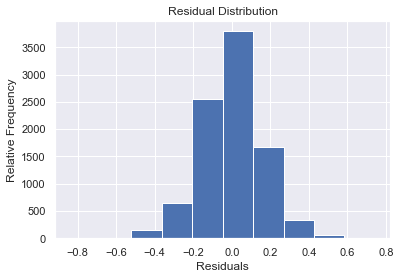

In [75]:
plt.hist(model.resid);
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency');

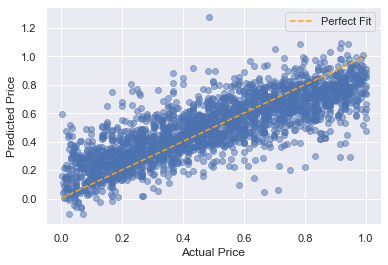

In [76]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = (y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

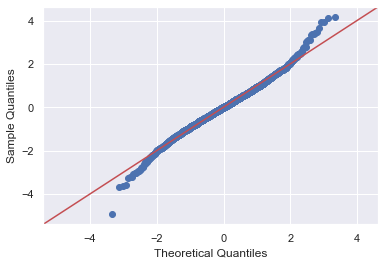

In [77]:
import statsmodels.api as sm
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Now we'll find the coefficients of bedrooms and put them in descending order in bar graph as it correlates to price. 

In [78]:
coef = model.params
coef

Intercept       -8.196823
lat              0.597662
long             0.160536
age              0.000770
has_bsmnt       -0.022030
                   ...   
gr_7            -0.271828
gr_8            -0.199350
gr_9            -0.071444
sqft_living      0.102380
sqft_living15    0.039341
Length: 100, dtype: float64

In [79]:
bed_coef = coef.head(13)
bed_coef = bed_coef.drop(bed_coef.index[0:5])
bed_coef = bed_coef.sort_values(ascending=False)
bed_coef

bed_2   -0.003153
bed_4   -0.009977
bed_3   -0.017419
bed_5   -0.025231
bed_6   -0.068925
bed_7   -0.119293
bed_8   -0.125100
bed_9   -0.159893
dtype: float64

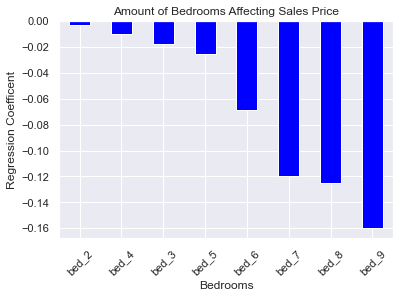

In [80]:
bed_coef.plot.bar(xlabel='Bedrooms', ylabel='Regression Coefficent', 
                title='Amount of Bedrooms Affecting Sales Price', rot=45, color='blue');

From this model, we can see that as bedrooms increase, there's a negative coefficient towards price. As bedrooms increases, the price of the home decreases. That could be because larger houses with more bedrooms may be in less desirable areas, or may be older and need repairs. Bigger houses with more bedrooms may be harder to sell due to a lack of demand for that many bedrooms in the local housing market.

In [81]:
coefs = model.params
coefs = coefs.sort_values(ascending=False)
print(coefs)

lat          0.597662
zip_98107    0.530722
zip_98112    0.502519
zip_98105    0.498980
zip_98109    0.491741
               ...   
gr_8        -0.199350
gr_7        -0.271828
gr_6        -0.322224
gr_5        -0.365329
Intercept   -8.196823
Length: 100, dtype: float64


In [82]:
codes = coefs.head(11)
codes

lat          0.597662
zip_98107    0.530722
zip_98112    0.502519
zip_98105    0.498980
zip_98109    0.491741
zip_98116    0.478155
zip_98119    0.469488
zip_98102    0.452596
zip_98199    0.447481
zip_98117    0.446486
zip_98136    0.437043
dtype: float64

In [83]:
codes = codes.drop(codes.index[0])
codes

zip_98107    0.530722
zip_98112    0.502519
zip_98105    0.498980
zip_98109    0.491741
zip_98116    0.478155
zip_98119    0.469488
zip_98102    0.452596
zip_98199    0.447481
zip_98117    0.446486
zip_98136    0.437043
dtype: float64

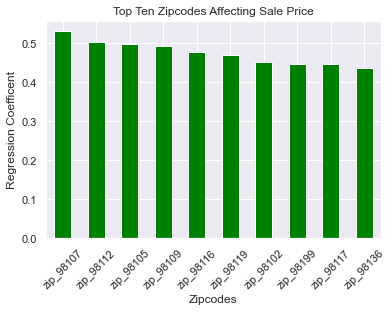

In [84]:
codes.plot.bar(xlabel='Zipcodes', ylabel='Regression Coefficent', 
                title='Top Ten Zipcodes Affecting Sale Price', rot=45, color='green');

We can see these zipcodes have the highest correlation to the value of the home. 